In [20]:
import os
import pickle
import numpy as np
import pandas as pd
from astropy.table import Table
import matplotlib.pyplot as plt

COLOR = 'k'
plt.rcParams['font.size'] = 20
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR

plt.rcParams['xtick.major.width'] = 3
plt.rcParams['ytick.major.width'] = 3
plt.rcParams['xtick.major.size']  = 10 #12
plt.rcParams['ytick.major.size']  = 10 #12

plt.rcParams['xtick.minor.width'] = 1
plt.rcParams['ytick.minor.width'] = 1
plt.rcParams['xtick.minor.size']  = 6
plt.rcParams['ytick.minor.size']  = 6

plt.rcParams['axes.linewidth'] = 3

plt.rcParams['font.size'] = 20
plt.rcParams['text.color'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['axes.spines.top'] = True
plt.rcParams['axes.spines.right'] = True
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['axes.edgecolor'] = COLOR
plt.rcParams['figure.facecolor'] = 'none'
plt.rcParams['legend.facecolor'] = 'none'

parula=np.load('/Users/arcticfox/parula_colors.npy', allow_pickle=True)

In [2]:
line_table = Table.read('/Users/arcticfox/Documents/AUMic/aumic_linelist.csv',
                        format='csv', comment='#')
line_table = line_table[line_table['X-ray']==0]

dict_path = '/Users/arcticfox/Documents/AUMic/'
qdict = pd.read_pickle(os.path.join(dict_path, r'aumic_q_linelist_updated.pkl'))
fdict = pd.read_pickle(os.path.join(dict_path, r'aumic_f_linelist_updated.pkl'))

In [3]:
actual_keys = np.zeros(len(line_table), dtype='U10')
for i in range(len(line_table)):
    actual_keys[i] = ''.join(line_table['Ion'][i].split(' '))

/Users/arcticfox/opt/anaconda3/lib/python3.9/site-packages/numpy/ma/core.py:6852: RuntimeWarning: overflow encountered in power
  result = np.where(m, fa, umath.power(fa, fb)).view(basetype)
/var/folders/gz/h7_ym7m52dlgq4xpllc1x3m40000gn/T/ipykernel_1079/406541682.py:54: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "rasterize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('/Users/arcticfox/Documents/AUMic/paper/table3.pdf',


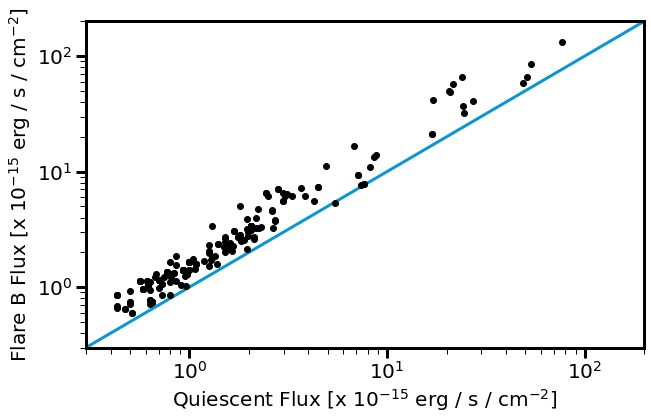

In [82]:
tab = Table(names=['\colhead{Ion}','\colhead{$\lambda_\textrm{rest}$ [\AA]}',
                   '\colhead{$\lambda_\textrm{obs}$ [\AA]}','\colhead{Velocity Shift [km s$^{-1}$]}',
                   '\colhead{Flux (Quiescent)}','\colhead{FWHM (Quiescent)}',
                   '\colhead{Flux (Flare B)}','\colhead{FWHM (Flare B)}'],
           dtype=['U10', np.float64, np.float64, np.float64, 'U20', 'U20', 'U20', 'U20'])

scale = 1e-15

plt.figure(figsize=(10,6))
for i in range(len(line_table)):
    k = ''.join(line_table['Ion'][i].split(' '))
    wo = line_table[i]['wave_obs']+0.0
    try:
        closest = np.argmin(np.abs(wo-qdict[k]['centers']))
        fq = np.round(qdict[k]['Fline'][closest]/scale,2)
        fqe= np.round(qdict[k]['FlineErr'][closest]/scale,2)
        
        fwhm_q = qdict[k]['sig'][closest]*2*np.sqrt(2*np.log(2))
        fwhm_qe= qdict[k]['sigErr'][closest]*2*np.sqrt(2*np.log(2))

        ff = np.round(fdict[k]['Fline'][closest]/scale,2)
        ffe= np.round(fdict[k]['FlineErr'][closest]/scale,2)
        
        fwhm_f = fdict[k]['sig'][closest]*2*np.sqrt(2*np.log(2))
        fwhm_fe= fdict[k]['sigErr'][closest]*2*np.sqrt(2*np.log(2))
        #print(ff, ffe)
        plt.errorbar(fq,ff, c='k',
                     #yerr=ffe/np.log(10)/np.pi, xerr=fqe/np.log(10)/np.pi,
                     alpha=0.2,
                     marker='',zorder=10)
        plt.errorbar(fq,ff, c='k',                    
                     marker='o',zorder=10)

        tab.add_row([line_table['Ion'][i], 
                         np.round(line_table['Wavelength'][i],2),
                     np.round(line_table['wave_obs'][i],2),
                     np.round(line_table['velocity_offset'][i],2),
                     ' '.join(str(e) for e in [np.round(fq,2), '$\pm$', np.round(fqe,2)]),
                     ' '.join(str(e) for e in [np.round(fwhm_q,2), '$\pm$', np.round(fwhm_qe,2)]),
                     ' '.join(str(e) for e in [np.round(ff,2), '$\pm$', np.round(ffe,2)]),
                     ' '.join(str(e) for e in [np.round(fwhm_f,2), '$\pm$', np.round(fwhm_fe,2)])
                    ])
    except:
        pass
    #print(k, fq/scale, fqe/scale)
plt.plot(np.logspace(-3,300,10), np.logspace(-3,300,10), zorder=1, 
         color=parula[80], lw=3)
plt.yscale('log')
plt.xscale('log')
plt.xlim(0.3,200)
plt.ylim(0.3,200)
plt.xlabel('Quiescent Flux [x $10^{-15}$ erg / s / cm$^{-2}$]')
plt.ylabel('Flare B Flux [x $10^{-15}$ erg / s / cm$^{-2}$]')
plt.savefig('/Users/arcticfox/Documents/AUMic/paper/table3.pdf',
            rasterize=300, dpi=300, bbox_inches='tight')

In [5]:
tab.write('ion_list.txt', format='ascii.latex')

In [55]:
tab

\colhead{Ion},\colhead{$\lambda_ extrm{rest}$ [\AA]},\colhead{$\lambda_ extrm{obs}$ [\AA]},\colhead{Velocity Shift [km s$^{-1}$]},\colhead{Flux (Quiescent)},\colhead{FWHM (Quiescent)},\colhead{Flux (Flare B)},\colhead{FWHM (Flare B)}
str10,float64,float64,float64,str20,str20,str20,str20
N II,1083.99,1083.99,-2.67,4.26 $\pm$ 5.4,0.26 $\pm$ 0.02,5.58 $\pm$ 21.29,0.17 $\pm$ 0.03
N II,1084.58,1084.57,-2.67,8.22 $\pm$ 4.54,0.29 $\pm$ 0.02,10.96 $\pm$ 17.9,0.33 $\pm$ 0.09
He II,1084.94,1084.92,-5.33,24.57 $\pm$ 5.01,0.27 $\pm$ 0.01,32.28 $\pm$ 19.8,0.25 $\pm$ 0.03
N II,1085.54,1085.56,5.33,16.98 $\pm$ 5.17,0.32 $\pm$ 0.01,21.3 $\pm$ 20.4,0.36 $\pm$ 0.04
N II,1085.71,1085.66,-13.32,16.98 $\pm$ 5.17,0.32 $\pm$ 0.01,21.3 $\pm$ 20.4,0.36 $\pm$ 0.04
Si III,1108.36,1108.35,-2.61,2.22 $\pm$ 0.82,0.51 $\pm$ 0.03,4.77 $\pm$ 3.23,0.45 $\pm$ 0.05
Si III,1109.94,1109.95,0.0,3.69 $\pm$ 0.75,0.45 $\pm$ 0.01,7.17 $\pm$ 2.96,0.35 $\pm$ 0.02
Si III,1113.2,1113.21,0.0,4.92 $\pm$ 0.63,0.3 $\pm$ 0.01,11.15 $\pm$ 2.54,0.46 $\pm$ 0.03
C I,1114.39,1114.35,-10.38,1.64 $\pm$ 0.59,0.62 $\pm$ 0.05,2.04 $\pm$ 2.33,0.47 $\pm$ 0.07
